In [21]:
class Dataset:
    def __init__(self, file):
        self.data = open(file).read().split('\n')
        
        for i in range(0, len(self.data)):
            self.data[i] = self.data[i].split(',')

            for j in range(0, len(self.data[i])):
                self.data[i][j] = self.convert_to_appropriate_type(self.data[i][j])

    def convert_to_appropriate_type(self, data):
        try:
            return int(data)
        except ValueError:a
            try:
                return float(data)
            except ValueError:
                return data

    def get_first_row(self):
        return self.data[0]

    def get_data(self):
        return self.data

    def write(self):
        print(self.data)

    def read(file):
        return Dataset(file)

In [22]:
import math

class MathUtils:
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + math.exp(-1 * z))

    @staticmethod
    def delta_theta(y, y_hat, x):
        return 2 * (MathUtils.sigmoid(y) - y_hat) * (1 - MathUtils.sigmoid(y)) * MathUtils.sigmoid(y) * x

    @staticmethod
    def delta_bias(y, y_hat):
        return 2 * (MathUtils.sigmoid(y) - y_hat) * (1 - MathUtils.sigmoid(y)) * MathUtils.sigmoid(y)

    @staticmethod
    def prediction(sigmoid):
        return round(sigmoid)

    @staticmethod
    def target(thetas, variables, bias):
        target = 0

        for i in range(0, len(thetas)):
            target = target + (thetas[i] * variables[i])

        return (target + bias)

In [23]:
import random
import math

class Model:
    def __init__(self, dataset):
        self.dataset = dataset
        self.labels = []
        self.binary_labels = []
        self.thetas = []
        self.bias = []
        self.number_of_correct_predictions = []
        self.accuracy = []
        self.total_errors = []
        self.average_errors = [[], []]
        self.variables_count = 0
        self.set_labels()
        self.output_neuron_count = math.ceil(math.log(len(self.labels), 2))
        self.set_binary_labels()
        self.set_variables()
        self.set_random_thetas()
        self.set_random_bias()
        self.learning_rate = 0.8

    def set_random_thetas(self):
        for i in range(0, self.output_neuron_count):
            thetas = []

            for j in range(0, self.variables_count):
                thetas.append(random.random())

            self.thetas.append(thetas)

    def set_random_bias(self):
        for i in range(0, self.output_neuron_count):
            self.bias.append(random.random())

    def set_binary_labels(self):
        for i in range(0, len(self.labels)):
            self.binary_labels.append(('0' * (self.output_neuron_count - len(str(bin(i))[2:]))) + str(bin(i))[2:])

    def set_labels(self):
        for row in self.get_data():
            for col in row:
                if isinstance(col, str):
                    if not col in self.labels:
                        self.labels.append(col)

    def set_learning_rate(self, learning_rate):
        self.learning_rate = learning_rate

    def set_variables(self):
        first_row = self.get_first_row()

        for col in first_row:
            if not isinstance(col, str):
                self.variables_count = self.variables_count + 1
                
    def calculate_new_bias(self, bias, delta_bias):
        return bias - (self.learning_rate * delta_bias)
    
    def calculate_new_theta(self, theta, delta_theta):
        return theta - (self.learning_rate * delta_theta)
    
    def calculate_error(self, category, sigmoid):
        return (float(category) - float(sigmoid)) ** 2
    
    def set_average_error(self):
        for i in range(0, 2):
            for j in range(0, len(self.total_errors)):
                self.average_errors[i].append(self.total_errors[j][i] / len(self.total_errors))

    def set_new_thetas_and_bias(self, row, current_epoch):
        predicted_category = 0
        sigmoids = []

        for i in range(0, len(self.thetas)):
            target = MathUtils.target(self.thetas[i], row[0:self.variables_count], self.bias[i])
            sigmoid = MathUtils.sigmoid(target)
            sigmoids.append(sigmoid)
            prediction = MathUtils.prediction(sigmoid)

            if(prediction == 1):
                predicted_category = i
            
            for j in range(0, len(self.thetas[i])):
                delta_theta = MathUtils.delta_theta(target, prediction, row[j])
                self.thetas[i][j] = self.calculate_new_theta(self.thetas[i][j], delta_theta)

            delta_bias = MathUtils.delta_bias(target, prediction)
            self.bias[i] = self.calculate_new_bias(self.bias[i], delta_bias)

        actual_category = self.get_category_from_class(self.get_row_class(row))
        
        if self.binary_labels[predicted_category] == actual_category:
            self.number_of_correct_predictions[current_epoch] = self.number_of_correct_predictions[current_epoch] + 1

        errors = []
        for i in range(0, len(sigmoids)):
            try:
                self.total_errors[current_epoch][i] = self.total_errors[current_epoch][i] + self.calculate_error(actual_category[i], sigmoids[i])
            except IndexError:
                errors.append(self.calculate_error(actual_category[i], sigmoids[i]))
                
        if len(errors) > 0:
            self.total_errors.append(errors)
    
    def get_category_from_class(self, class_name):
        return self.binary_labels[self.labels.index(class_name)]
    
    def get_row_class(self, row):
        return row[self.variables_count]

    def get_first_row(self):
        return self.dataset.get_first_row()

    def get_data(self):
        return self.dataset.get_data()

    def train(self, epoch):
        for i in range(0, epoch):
            self.number_of_correct_predictions.append(0)
            
            for row in self.get_data():
                self.set_new_thetas_and_bias(row, i)
                
            self.accuracy.append(self.number_of_correct_predictions[i] / 150)
                
        self.set_average_error()

    def read(file):
        return Model(Dataset.read(file))

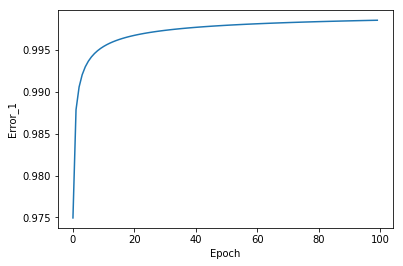

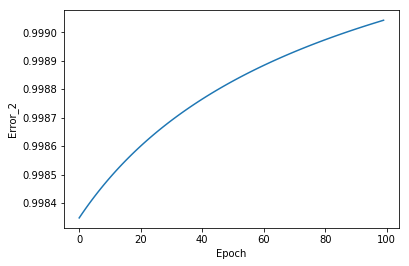

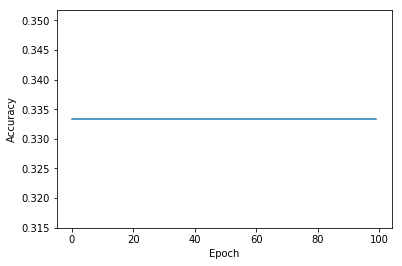

In [24]:
import matplotlib.pyplot as plt

dataset = Dataset.read('iris_data.csv')

model = Model.read('iris_data.csv')
model.train(100)

import matplotlib.pyplot as plt
plt.plot(model.average_errors[0])
plt.ylabel('Error_1')
plt.xlabel('Epoch')
plt.show()

plt.plot(model.average_errors[1])
plt.ylabel('Error_2')
plt.xlabel('Epoch')
plt.show()

plt.plot(model.accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()